## IS6 in Python: Testing Hypotheses (Chapter 15)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 15: Testing Hypotheses

In [2]:
#Load in libraries
import pandas as pd
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import seaborn as sns

#### Section 15.1: Hypotheses
#### Section 15.2: P-Values
#### Section 15.3: The Reasoning of Hypothesis Testing
#### Example 15.5: Finding A P-Value

In [3]:
#P-Value using a normal distribution
n = 90
x = 61
p = 0.8
phat = x/n
sdphat = ((p * (1-p)) / n) ** 0.5
z = (phat - p) / sdphat
print(norm.cdf(z))

0.001873240452646042


In [4]:
#Or calculate everything in one line
print(norm.cdf(x = phat, loc = p, scale = sdphat))

0.001873240452646042


#### Section 15.4: A Hypothesis Test for the Mean

In [5]:
time = pd.read_csv("datasets/nashville.txt", sep = "\t")
time

,Gestation Time
0,251
1,263
2,265
3,240
4,268
...,...
65,269
66,261
67,278
68,253


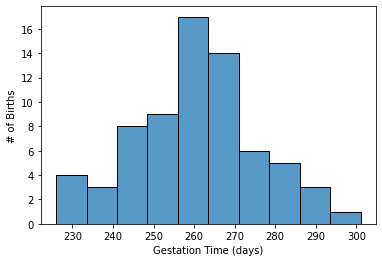

In [6]:
sns.histplot(data = time, x = "Gestation Time", binwidth = 7.5)
plt.xlabel("Gestation Time (days)")
plt.ylabel("# of Births")
plt.show()

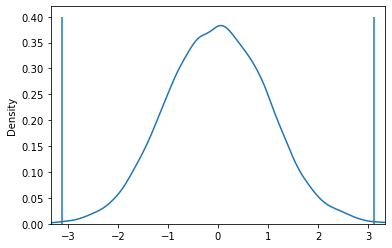

In [7]:
#Generate a t distribution with df = 69
t_dist = t.rvs(df = 69, size = 10000)
sns.kdeplot(t_dist)
plt.vlines(x = -3.118, ymin = 0, ymax = 0.4)
plt.vlines(x = 3.118, ymin = 0, ymax = 0.4)
plt.xlim([-3.347,3.347])
plt.show()

#### Step-By-Step Example: A One-Sample t-Test for the Mean

In [8]:
sleep = pd.read_csv("datasets/sleep.txt", sep = "\t")

In [9]:
print(sleep.describe())

           Sleep
count  25.000000
mean    6.640000
std     1.075484
min     4.000000
25%     6.000000
50%     7.000000
75%     7.000000
max     8.000000


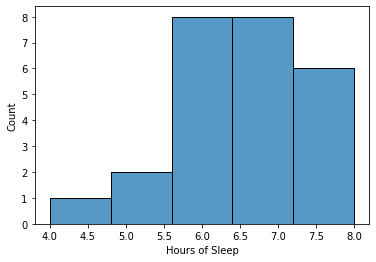

In [10]:
sns.histplot(data = sleep, x = "Sleep", bins = 5)
plt.xlabel("Hours of Sleep")
plt.show()

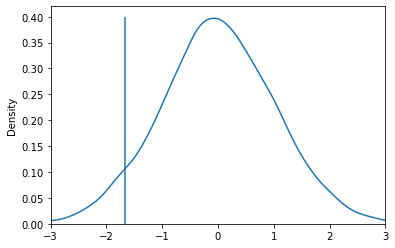

In [11]:
#Generate t distribution with df = 69
t_dist = t.rvs(df = 24, size = 10000)
sns.kdeplot(t_dist)
plt.vlines(x = -1.67, ymin = 0, ymax = 0.4)
plt.xlim([-3,3])
plt.show()

In [12]:
#Mechanics
n = 25
mean = 7
df = 24
y = 6.64
s = 1.075
sey = s / (n ** 0.5)
t_ = (y - mean) / sey
#Calculate p-value using t distribution
print(t.cdf(x = t_, df = 24))

0.05351624715472282


#### Section 15.5: Intervals and Tests

In [13]:
#Page 514
temp = pd.read_csv("datasets/normal-temperature.txt", sep = "\t")
temp.head()

,Temp
0,97.3
1,97.4
2,97.4
3,97.4
4,97.4


In [14]:
print(temp.describe())

             Temp
count   52.000000
mean    98.284615
std      0.682379
min     97.200000
25%     97.675000
50%     98.200000
75%     98.700000
max    100.000000


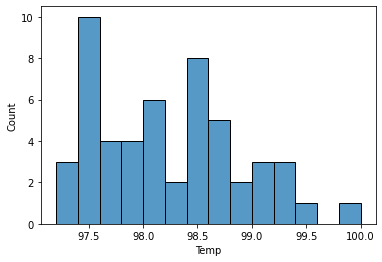

In [15]:
sns.histplot(data = temp, x = "Temp", binwidth = 0.2)
plt.show()

In [32]:
#Confidence Interval
import numpy as np
y = temp.mean()
print(f"y: {y}")
s = temp.std()
print(f"s: {s}")
n = temp.count()
print(f"n: {n}")
se = np.sqrt(s/n)
print(f"se: {se}")
tstats = t.interval(loc = y, scale = se, df = n-1, alpha = 0.95)
print(f"confidence interval: {tstats}")

y: Temp    98.284615
dtype: float64
s: Temp    0.682379
dtype: float64
n: Temp    52
dtype: int64
se: Temp    0.114554
dtype: float64
confidence interval: (array([98.05463817]), array([98.5145926]))


Question: I followed the guide on how to calculate confidence interval for mean in Teaching4, but I got a different interval than what is shown in the book. -> fixed alpha value (we realized is not significance value) and also changed standard deviation to standard error since i think you're not using the entire sample.

In [17]:
#Hypothesis test
mu = 98.6
test = (y - mu) / (s / (n ** 0.5))
print(test)

Temp   -3.332856
dtype: float64


In [18]:
#Two-sided test - code equilavent to pt() in R
print(2 * t.cdf(x = test, df = n - 1))

[0.00160585]


#### Note: pt() == t.cdf()
- pt() in R is used to return the probability cumulative density of the Student t-distribution
- t.cdf() in Python is used to calculate the cumulative distribution function using t-distribution

#### Random Matters: Bootstrap Hypothesis Tests and Intervals
#### Step-By-Step Example: Tests and Intervals

In [19]:
#Create dataset
baseball = (["Home"] * 1308) + ["Away"] * (2431 - 1308)
baseball = pd.DataFrame(baseball, columns = ["winner"])
baseball.head()

,winner
0,Home
1,Home
2,Home
3,Home
4,Home


In [20]:
#Mechanics, page 517
n = baseball.count()
p = 0.5
phat = baseball[baseball["winner"] == "Home"].count() / n
print(f"phat: {phat}")
sdphat = ((p * (1 - p)) / n) ** 0.5
print(f"sdphat: {sdphat}")
z = (phat - p) / sdphat
print(f"z value: {z}")

phat: winner    0.53805
dtype: float64
sdphat: winner    0.010141
dtype: float64
z value: winner    3.752142
dtype: float64


In [21]:
#p-value
print(1 - norm.cdf(z))
#Or, without calculating the z-score
print(1 - norm.cdf(x = phat, loc = p, scale = sdphat))

[8.76651022e-05]
[8.76651022e-05]


In [22]:
#Mechanics, page 518
sep = ((phat * (1 - phat)) / n) ** 0.5
print(sep)
me = 1.96 * sep
print(f"Lower bound of 95% confidence: {phat - me}")
print(f"upper bound of 95% confidence: {phat + me}")

winner    0.010112
dtype: float64
Lower bound of 95% confidence: winner    0.518232
dtype: float64
upper bound of 95% confidence: winner    0.557869
dtype: float64


#### Section 15.6: P-Values and Decisions: What to Tell About a Hypothesis Test